In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Lab 4: Fire and Tree Mortality

# About the data
Wildfires are increasingly frequent and severe due to climate change. Predicting tree mortality following a wildfire is critical for forest management, ecosystem recovery, and carbon sequestration planning. In this lab, we will build a logistic regression model to predict the probability of tree mortality one year after a wildfire

The database we'll be working with today includes observations of individual trees involved in prescribed fires and wildfires occurring over 35 years, from 1981 to 2016. It is drawn from a fire and tree mortality database from the US Forest Service (see data description for the full database here: [link](https://www.nature.com/articles/s41597-020-0522-7#Sec10)).

The target variable we'll use is `yr1status`, which is a binary variable (0=alive, 1=dead).  This tells us if a tree has died one year after a fire event.

The features we'll use are `YrFireName`, `Times_burned`, `Species`, `Genus_species`,
    `DBH_cm`, `HT_m`, `CR_pre`, and `CR_post`.

## Step 1: Check the metadata

Look at the metadata and provide a description on what each variable represents in the Description column below.


| Feature                     | Description                                                                                   |
|-----------------------------|-----------------------------------------------------------------------------------------------| 
| yr1status                   | 0=Alive 1=Dead 1 year after fire
| YrFireName                  | Year of Fire                                    
| Times_burned                | Times burned                                             
| Species                     | Species of tree                                                    
| Genus_species               | Genus of tree species                                       
| DBH_cm                      | Diameter at Breast Height
| HT_m                        | Height in meters
| CR_pre                      | Crown Ratio pre-fire
| CR_post                     | Crown Ratio post-fire

## Step 2: Fetch  data
Read in the data set and filter to retain only the variables of interest.  Then check for incomplete observations and remove any rows containing NaNs.  How many observations does that leave us with? **Print your answer.**

In [3]:
# Load the dataset
trees_dat = pd.read_csv('/courses/EDS232/Data/FTM_trees.csv')

trees_clean =trees_dat.loc[:,['yr1status', 'YrFireName', 'Times_burned','Species', 'Genus_species', 'DBH_cm', 'HT_m', 'CR_pre', 'CR_post']]

trees_clean.dtypes

trees_clean = trees_clean.dropna()

trees_clean.head()

/tmp/ipykernel_1453178/3975139904.py:2: DtypeWarning: Columns (4,5,6,7,10,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  trees_dat = pd.read_csv('/courses/EDS232/Data/FTM_trees.csv')


,yr1status,YrFireName,Times_burned,Species,Genus_species,DBH_cm,HT_m,CR_pre,CR_post
500,0.0,2003 - Griff,1,ABAM,Abies_amabilis,71.374,41.76,0.84,0.74
501,0.0,2003 - Griff,1,ABAM,Abies_amabilis,23.622,12.80,0.60,0.57
502,0.0,2003 - Griff,1,ABAM,Abies_amabilis,46.228,34.75,0.75,0.59
503,0.0,2003 - Griff,1,ABAM,Abies_amabilis,21.082,23.16,0.38,0.38
504,0.0,2003 - Griff,1,ABAM,Abies_amabilis,24.384,26.21,0.42,0.42


## Step 3: Data Preprocessing
1. We recode categorical predictors to zero-based integer form because most machine learning models, including logistic regression, cannot work directly with categorical data represented as strings or labels. Instead, models require numerical input. Let's do that here. 


In [4]:
for col in ['Genus_species', 'YrFireName', 'Species']: 
    trees_clean[col], _ = pd.factorize(trees_clean[col], sort = True)
    
trees_clean

,yr1status,YrFireName,Times_burned,Species,Genus_species,DBH_cm,HT_m,CR_pre,CR_post
500,0.0,37,1,0,0,71.374,41.76,0.84,0.74
501,0.0,37,1,0,0,23.622,12.80,0.60,0.57
502,0.0,37,1,0,0,46.228,34.75,0.75,0.59
503,0.0,37,1,0,0,21.082,23.16,0.38,0.38
504,0.0,37,1,0,0,24.384,26.21,0.42,0.42
...,...,...,...,...,...,...,...,...,...
169332,0.0,33,1,31,31,32.512,15.54,0.90,0.90
169333,0.0,33,1,31,31,24.892,14.63,0.81,0.81
169334,0.0,33,1,31,31,32.258,16.46,0.85,0.63
169335,0.0,33,1,31,31,31.750,18.59,0.87,0.80


2. Then we'll split into training and test data and scale for coefficient interpretability.  Recall that we use the training features to calculate our scaling parameters (mean and standard deviation) and apply the scaling to those training features (`scaler.fit_transform`) and then apply the scaling to the features in the test data as well (`scaler.transform`).


In [5]:
X = trees_clean.drop(columns=['yr1status'])
Y = trees_clean['yr1status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. How many training/test observations do we have? Print your answer in the cell below. 

In [ ]:
# Verify the training and testing set size
print("Training set observations:", len(X_train))
print("Testing set observations:", len(X_test))

Training set observations: 25556
Testing set observations: 10953


## Step 4: Train a Logistical Model
Create a classifier using `LogisticRegression()` and fit it on the training data.  Then assess the model's accuracy on the training set by making predictions on the training data.  Calculate and **print** the accuracy of your model on the training set. 

In [31]:
#glm = LogisticRegression()

#glm.fit(X_train_scaled, y_train)

#y_train_pred = glm.predict(X_train_scaled)

#accuracy = accuracy_score(y_train, y_train_pred)
#print(accuracy)

0.945061825011739


In [28]:
# Create the Logistic Regression model
glm = LogisticRegression()

# Train the model on the training data
glm.fit(X_train_scaled, y_train)

training_accuracy = glm.score(X_train_scaled, y_train)

print(f"Training Accuracy: {training_accuracy:.4f}")

Training Accuracy: 0.9451


## Step 5: Test Set Predictions and Model Evaluation
Now let's take our trained logistic classifier and make predictions on the test set. Calculate the accuracy and confusion matrix. Then use `sns.heatmap` for improved confusion matrix visualization.

Test set accuracy: 0.9401990322286131
Confusion Matrix:
 [[9838  195]
 [ 460  460]]


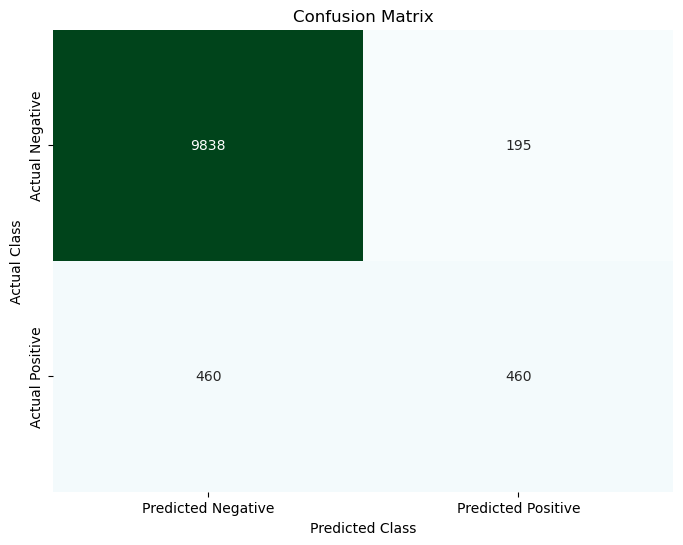

In [22]:
# Make predictions on the training data
y_train_pred = glm.predict(X_train_scaled)
y_test_pred = glm.predict(X_test_scaled)


# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using sns.heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

## Step 6: Logistic Classifier Evaluation
How did your model perform on the unseen data? 
Does your model perform differently on observations of trees that survived vs trees that died?
Is there a class imbalance in this data set?

The model did a really good job prediciting trees that were alive, with 9838 true negatives and only 195 false positives. However, the model did fairly poor at predicting trees that were dead with 460 false negatives and 460 true positives. Yes there is a class imbalance with alive making up over 90% of the data set. 

## Step 7: What about a Dummy?
What do you think would happen if we built a model that always predicts the majority class (alive trees)? How would its accuracy compare to your logistic regression model?

The accuracy would be almost the same because of the high class imbalance, over 90% being alive trees.

Let's go ahead and do it: use `DummyClassifier()` with the appropriate value for the 'strategy' parameter to train a majority classifier.  Then calculate this model's accuracy on the training data.

Dummy Accuracy: 0.9172405697292221
Dummy Classifier Confusion Matrix:
 [[23441     0]
 [ 2115     0]]


Text(0.5, 1.0, 'Dummy Classifier Confusion Matrix')

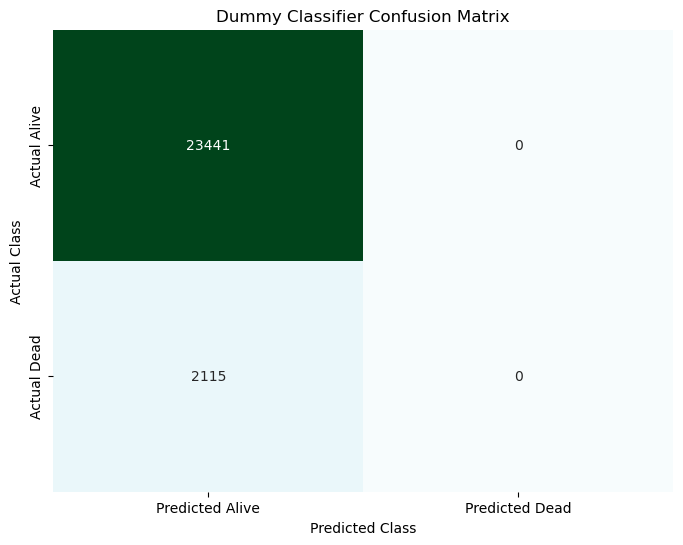

In [ ]:
# Create a dummy classifier that always predicts the majority class
dummy_clf = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier on the training data
dummy_clf.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_dummy_pred = dummy_clf.predict(X_train_scaled)

# Print accuracy and confusion matrix results
dummy_train_accuracy = accuracy_score(y_train, y_train_dummy_pred)
print("Dummy Accuracy:", dummy_train_accuracy)

# Generate confusion matrix for the dummy classifier
dummy_conf_matrix = confusion_matrix(y_train, y_train_dummy_pred)
print("Dummy Classifier Confusion Matrix:\n", dummy_conf_matrix)

# Plot the confusion matrix using sns.heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dummy_conf_matrix, annot=True, fmt='d', cmap='BuGn', cbar=False,
            xticklabels=["Predicted Alive", "Predicted Dead"],
            yticklabels=["Actual Alive", "Actual Dead"])

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Dummy Classifier Confusion Matrix")

# Step 8: ROCs and AUCs
Our two models have similar accuracy, but is that all there is to this story?  Let's dig a little deeper on the comparison of our logistic and dummy classifiers by examining the associated receiver-operator characteristic (ROC) curves. Calculate the area under the curve (AUC) for both models.

In [ ]:
# Logistic classifier AUC
y_train_prob = glm.predict_proba(X_train_scaled)[:,1]

# Calculate ROC curve 
fpr, tpr, _ = roc_curve(y_train, y_train_prob)

# Calculate AUC
auc = roc_auc_score(y_train, y_train_prob)
print(f"Logistic AUC: {auc}")

Logistic AUC: 0.9299952508904454


In [ ]:
# Dummy classifier AUC
y_train_dummy_prob = dummy_clf.predict_proba(X_train_scaled)[:, 1]

# Calculate ROC curve
fpr_dummy, tpr_dummy, _ = roc_curve(y_train, y_train_dummy_prob)

# Calculate AUC
auc_dummy = roc_auc_score(y_train, y_train_dummy_prob)
print(f"Dummy AUC:", auc_dummy)

Dummy AUC: 0.5


# Step 9: Plot dummy and logistic model ROC curves
Now using the outputs from `roc_curve()`, plot the ROC curves for both models on the same plot.  Make sure to use appropriate labels in the legend.

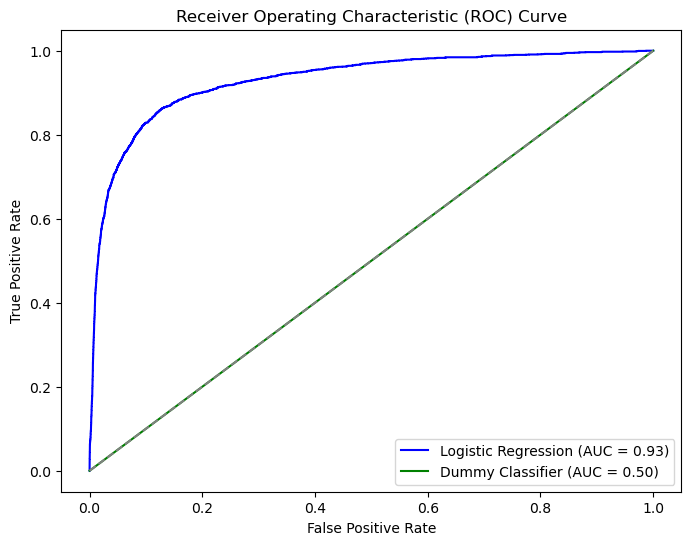

In [ ]:
# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot(fpr_dummy, tpr_dummy, color='green', label='Dummy Classifier (AUC = %0.2f)' % auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

How do the two models compare on AUC?  What are the implications for evaluating classifiers based on accuracy of their predictions?

The dummy AUC is .5 which is no better than guessing. It cannot distinguish alive trees from dead. 
The logisitic AUC .93, which is excellent at predicting alive and dead trees, 1 being a perfect model. 

# Step 10: Final interpretation

Identifying the most important features in a model can guide decision-making. For instance, in our dataset, highly important features might indicate key factors affecting tree survival after a fire. We will calculate the feature importance by examining the coefficients of our logistic regression model.

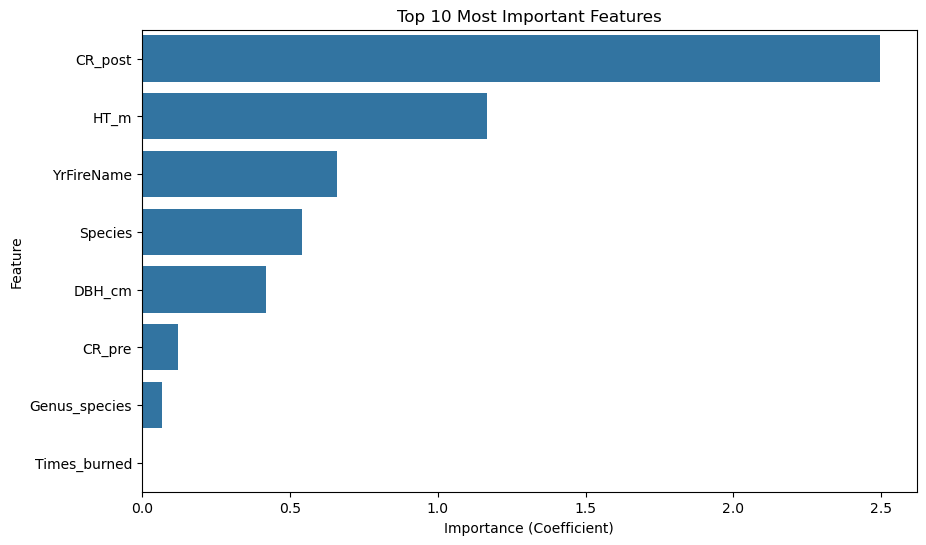

         Feature  Coefficient  Importance
7        CR_post    -2.494974    2.494974
5           HT_m    -1.165414    1.165414
0     YrFireName    -0.660497    0.660497
2        Species     0.541509    0.541509
4         DBH_cm     0.421324    0.421324
6         CR_pre     0.123414    0.123414
3  Genus_species    -0.067867    0.067867
1   Times_burned     0.000000    0.000000


In [ ]:
feature_names = X_train.columns 
coefficients = glm.coef_[0]

# Create a DataFrame with feature names and coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients (importance)
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


# First way: plot 

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))

plt.title('Top 10 Most Important Features')
plt.xlabel('Importance (Coefficient)')
plt.ylabel('Feature')
plt.show()

# Second way: print the feature importance

# Print the sorted feature importance
print(feature_importance)

Which are the most important features in our model (reference the metadata to help answer this)? Can you think of any implications for forest management or conservation strategy?

Most important are:

CR_post 
HT_m 

and less important:

YrFireName 
Species
DBH_cm

Since CR_post is a significant factor, managing crown ratios post-fire could be a critical part of forest fire recovery strategies. Taller trees tend to survive less so maybe focusing on how to prevent fires in those areas. 